In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install opencv-python==3.3.0.10 opencv-contrib-python==3.3.0.10


In [ ]:
import numpy as np    
import cv2    
from sklearn.cluster import MeanShift, estimate_bandwidth
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import glob
import  numpy as np

In [ ]:
root_dir = "/content/drive/My Drive/CVAssignment/Images Segment"


Mean Shift Segmentation

number clusters : 12


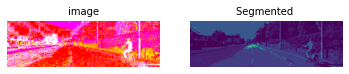

number clusters : 5


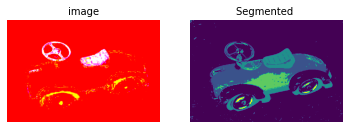

number clusters : 7


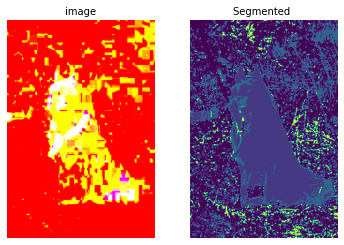

number clusters : 5


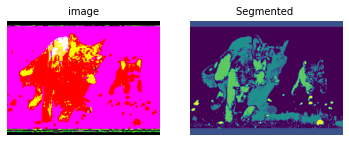

number clusters : 4


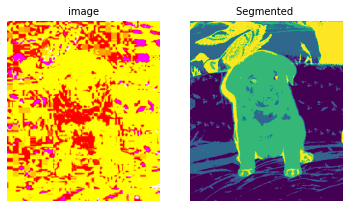

number clusters : 10


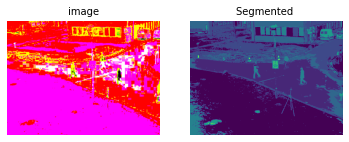

number clusters : 2


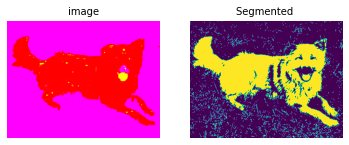

number clusters : 5


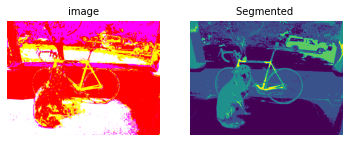

number clusters : 3


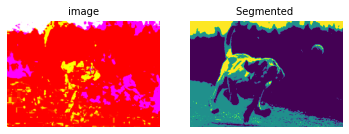

number clusters : 5


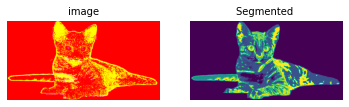

In [ ]:

from skimage.color import rgb2lab
for image in glob.iglob(root_dir + '**/*.jpeg', recursive=True):
  originImg = cv2.imread(image)
  originShape = originImg.shape
  flatImg=np.reshape(originImg, [-1, 3])
  bandwidth = estimate_bandwidth(flatImg, quantile=0.1, n_samples=100)    
  ms = MeanShift(bandwidth = bandwidth, bin_seeding=True)
  ms.fit(flatImg)
  labels=ms.labels_
  cluster_centers = ms.cluster_centers_    

  labels_unique = np.unique(labels)    
  n_clusters_ = len(labels_unique)    
  print("number clusters : %d" % n_clusters_)    

  segmentedImg = np.reshape(labels, originShape[:2])    

  image = rgb2lab(originImg)
  
  plt.figure()
  #for  Warning 
  #plt.imshow((out * 255).astype(np.uint8))

  plt.subplot(121), plt.imshow(image), plt.axis('off'), plt.title('image', size=10)
  plt.subplot(122), plt.imshow(np.reshape(labels, image.shape[:2])), plt.axis('off'), plt.title('Segmented ', size=10)
  plt.show()

K-Mean 

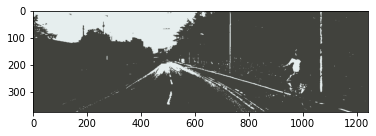

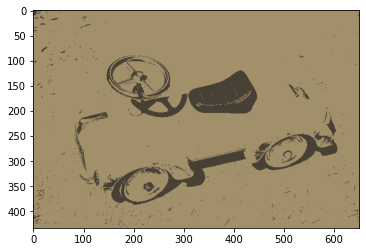

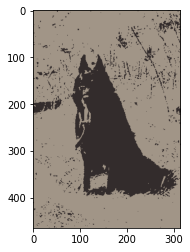

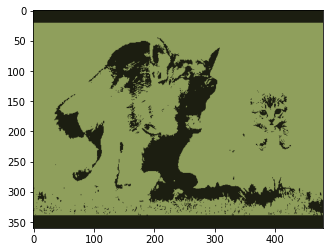

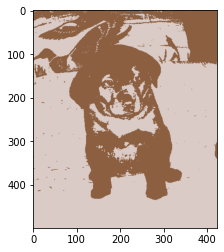

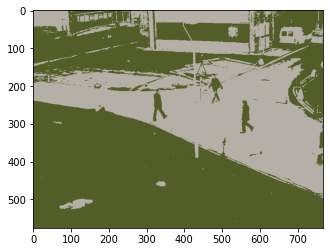

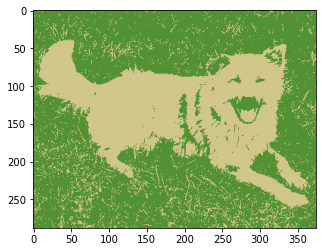

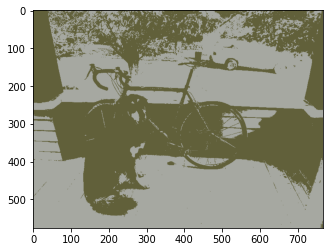

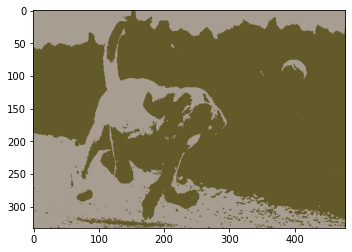

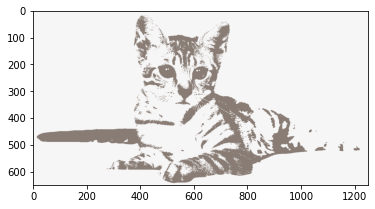

In [ ]:

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 2

for image in glob.iglob(root_dir + '**/*.jpeg', recursive=True):
    orginal_image = cv2.imread(image)
    orginal_image = cv2.cvtColor(orginal_image, cv2.COLOR_BGR2RGB)
    pixel_values = orginal_image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    labels = labels.flatten()
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(orginal_image.shape)
    plt.imshow(segmented_image)
    plt.show()

